In [18]:
import matplotlib.pyplot as plt
from astropy.table import Table
from matplotlib.patches import Rectangle
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [30]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
galDB = galDB.query('ids != 14713 and ids != 38126 and ids != 48631')
ferrdb = Table.read('Ferreras.txt',format='ascii').to_pandas() 
ferrdb = ferrdb.rename(index=str, columns={'col1':'ids', 'col2':'type', 'col3':'ra', 'col4':'dec', 
                                    'col5':'z','col6':'f160w', 'col7':'M', 'col8':'M_er',
                                    'col9': 'U-V','col10':'U-V_er','col11':'V-J','col12':'V-J_er','col13':'e'})

In [22]:
ferrdb

,ids,type,ra,dec,z,f160w,M,M_er,U-V,U-V_er,V-J,V-J_er,e
0,0.2083,L,189.191681,62.283558,0.953,21.65,0.67,(0.13),1.95,(0.20),1.66,(0.18),2
1,0.2144,E,189.167313,62.282146,0.943,20.80,0.88,(0.10),1.46,(0.14),0.82,(0.07),2
2,0.2183,L,189.180557,62.281265,0.944,20.86,0.61,(0.13),1.26,(0.17),0.96,(0.14),2
3,0.2240,E,189.155624,62.279949,0.943,20.34,1.95,(0.29),1.63,(0.14),1.12,(0.09),2
4,0.2241,E,189.155060,62.279434,0.852,20.15,1.75,(0.21),1.69,(0.06),1.01,(0.08),3
5,0.2350,E,189.198288,62.277798,1.361,22.08,1.37,(0.46),2.15,(0.24),2.49,(0.28),2
6,0.2460,E,189.193085,62.274826,0.503,19.38,0.57,(0.14),1.53,(0.21),1.21,(0.22),0
7,0.2502,E,189.145264,62.274536,0.849,20.81,0.73,(0.10),1.74,(0.14),1.38,(0.13),3
8,0.2589,E,189.163361,62.273373,0.849,20.73,1.02,(0.15),1.61,(0.17),1.15,(0.12),3
9,0.2590,E,189.163696,62.272980,0.850,20.89,1.04,(0.12),2.09,(0.09),1.58,(0.08),3


In [25]:
qsflag = np.repeat('s',repeats=len(ferrdb))

for i in range(len(ferrdb)):
    if ferrdb['U-V'][i]>=0.88*ferrdb['V-J'][i]+0.49 and ferrdb['U-V'][i]>1.382 and ferrdb['V-J'][i]<1.65:
        qsflag[i] = 'q'

In [31]:
ferrdb['QS']=qsflag

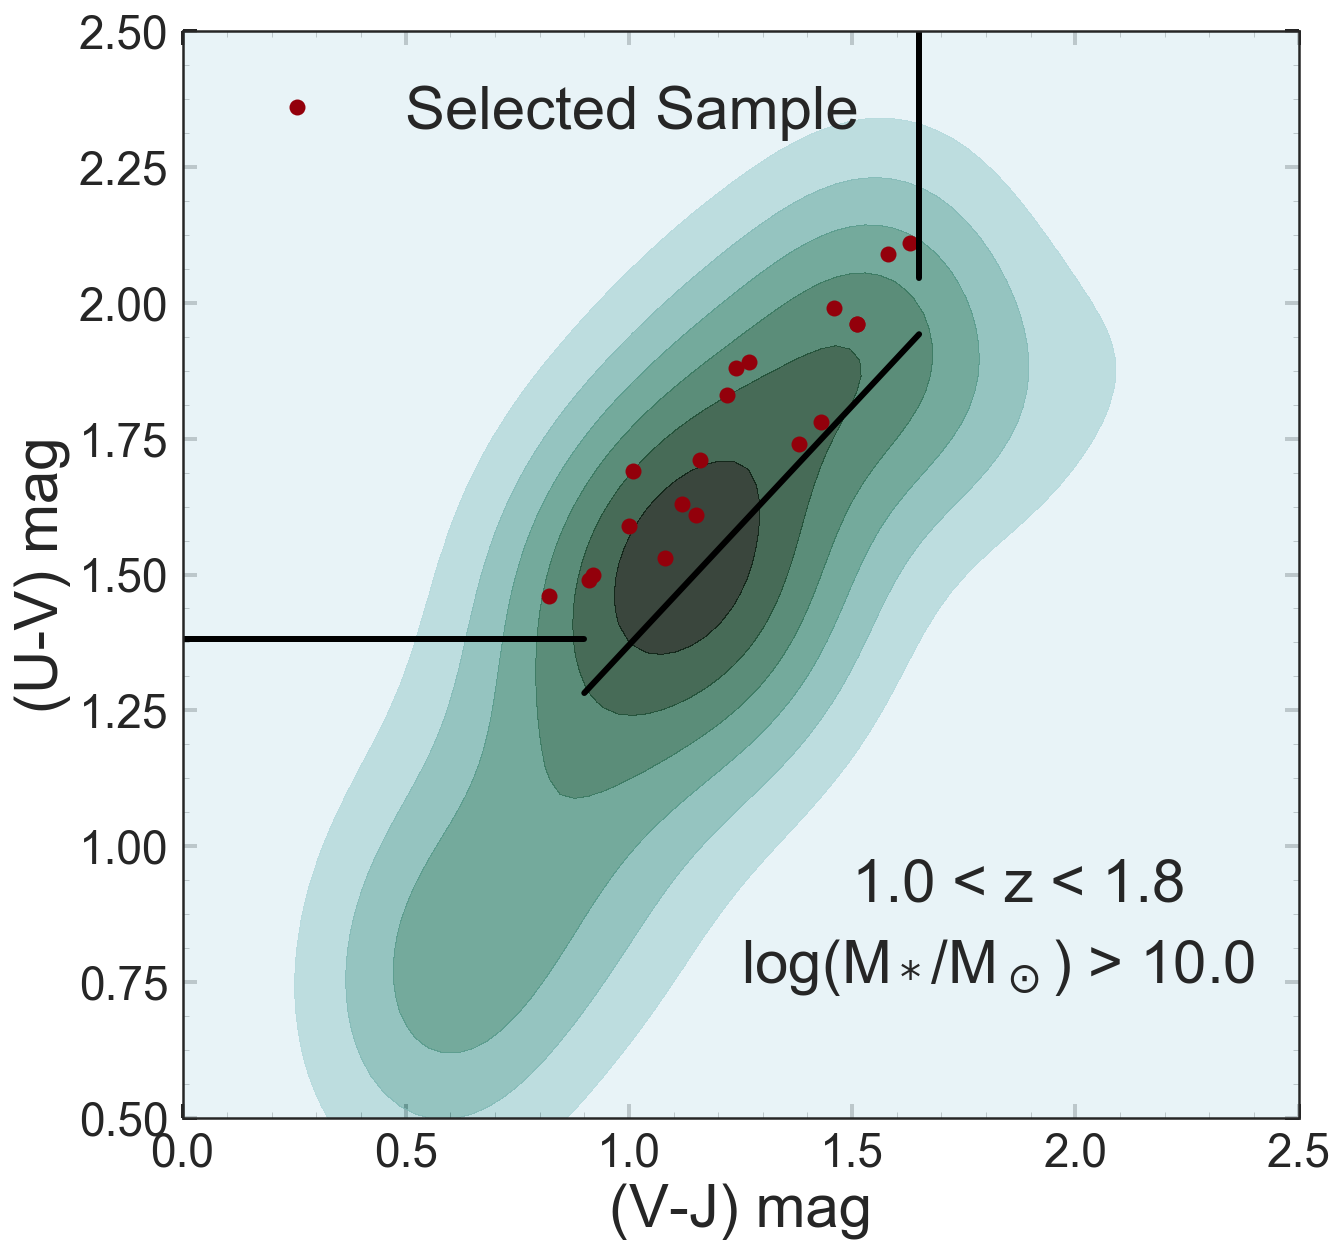

In [27]:
plt.figure(figsize=[10,10])
sea.kdeplot(ferrdb['V-J'],ferrdb['U-V'],n_levels = 7,alpha = .8,shade=True,cmap=cmap,kernel= 'epa',zorder=1)
plt.plot(ferrdb['V-J'][ferrdb.QS == 'q'],ferrdb['U-V'][ferrdb.QS == 'q'],'ro',color='#93000B',ms=8, label = 'Selected Sample')
plt.plot([0,.9],[1.382,1.382],'k',lw=.9,linewidth=3)
plt.plot([1.65,1.65],[2.045,2.5],'k',lw=.9,linewidth=3)
plt.plot([.9,1.65],[0.88*.9+0.49,0.88*1.65+0.49],'k',lw=.9,linewidth=3)
plt.axis([0,2.5,.5,2.5])
plt.legend(fontsize=30)
plt.text(1.5,0.90,'1.0 < z < 1.8', fontsize = 30)
plt.text(1.25,0.75,'log(M$_*$/M$_\odot$) > 10.0', fontsize = 30)
plt.xlabel('(V-J) mag',fontsize=30)
plt.ylabel('(U-V) mag',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.minorticks_on()

In [45]:
ferr_Q = ferrdb[ferrdb.QS == 'q']

In [41]:
params = np.array([[0.2144, -0.21, 0.21, 2.55, 0.31],
[0.2240, -0.17, 0.21, 3.26, 0.30],
[0.2241, -0.15, 0.25, 3.27, 0.35],
[0.2502, -0.04, 0.22, 1.85, 0.37],
[0.2589, -0.13, 0.22, 3.52, 0.25],
[0.2590, 0.14, 0.09, 2.36, 0.39],
[1.0411, -0.08, 0.22, 2.95, 0.24],
[1.0554, -0.19, 0.22, 3.22, 0.40],
[1.0704, -0.18, 0.24, 2.65, 0.40],
[2.1013, -0.19, 0.22, 2.54, 0.39],
[2.1630, 0.15, 0.08, 2.43, 0.43],
[2.1922, 0.11, 0.11, 2.01, 0.25],
[2.2084, 0.04, 0.15, 2.87, 0.23],
[2.2211, 0.05, 0.17, 2.54, 0.46],
[2.2408, 0.02, 0.20, 2.02, 0.34],
[2.2501, -0.05, 0.21, 3.07, 0.49],
[2.2956, -0.05, 0.21, 3.03, 0.49],
[2.4198, -0.20, 0.22, 2.55, 0.42],
[2.4272, -0.15, 0.25, 2.67, 0.31]]).T

In [46]:
ferr_Q['Z/H'] = params[1]
ferr_Q['Z/H_err'] = params[2]
ferr_Q['age'] = params[3]
ferr_Q['age_err'] = params[4]

/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [47]:
ferr_Q


,ids,type,ra,dec,z,f160w,M,M_er,U-V,U-V_er,V-J,V-J_er,e,QS,Z/H,Z/H_err,age,age_err
1,0.2144,E,189.167313,62.282146,0.943,20.80,0.88,(0.10),1.46,(0.14),0.82,(0.07),2,q,-0.21,0.21,2.55,0.31
3,0.2240,E,189.155624,62.279949,0.943,20.34,1.95,(0.29),1.63,(0.14),1.12,(0.09),2,q,-0.17,0.21,3.26,0.30
4,0.2241,E,189.155060,62.279434,0.852,20.15,1.75,(0.21),1.69,(0.06),1.01,(0.08),3,q,-0.15,0.25,3.27,0.35
7,0.2502,E,189.145264,62.274536,0.849,20.81,0.73,(0.10),1.74,(0.14),1.38,(0.13),3,q,-0.04,0.22,1.85,0.37
8,0.2589,E,189.163361,62.273373,0.849,20.73,1.02,(0.15),1.61,(0.17),1.15,(0.12),3,q,-0.13,0.22,3.52,0.25
9,0.2590,E,189.163696,62.272980,0.850,20.89,1.04,(0.12),2.09,(0.09),1.58,(0.08),3,q,0.14,0.09,2.36,0.39
10,1.0411,E,189.397415,62.329533,1.147,21.81,0.91,(0.19),1.78,(0.20),1.43,(0.19),0,q,-0.08,0.22,2.95,0.24
13,1.0554,E,189.397171,62.321640,0.836,20.09,1.60,(0.25),1.53,(0.16),1.08,(0.10),1,q,-0.19,0.22,3.22,0.40
18,1.0704,E,189.356262,62.313892,0.841,19.86,1.62,(0.20),1.49,(0.12),0.91,(0.09),1,q,-0.18,0.24,2.65,0.40
28,2.1013,L,53.169926,-27.771027,0.664,19.54,1.22,(0.13),1.59,(0.11),1.00,(0.09),2,q,-0.19,0.22,2.54,0.39


In [48]:
ferr_Q.to_pickle('../data/Q_ferreras.pkl')